In [ ]:
## Load the libraries
import numpy as np
import pandas as pd

## Section A. Load the data

In [ ]:
## Load the data
Vehicle_crash = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
Vehicle_crash.info()
Vehicle_crash.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845622 entries, 0 to 1845621
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,04/14/2021,5:32,NaN,NaN,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407480,Sedan,Sedan,NaN,NaN,NaN
1,04/13/2021,21:35,BROOKLYN,11217.0,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,4407147,Sedan,NaN,NaN,NaN,NaN
2,04/15/2021,16:15,NaN,NaN,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,4407665,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,04/13/2021,16:00,BROOKLYN,11222.0,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,Unspecified,NaN,NaN,NaN,4407811,Sedan,NaN,NaN,NaN,NaN
4,04/12/2021,8:25,NaN,NaN,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4406885,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


## Section B. Modify the Variables

### B.1. Location Variable

In [ ]:
# Read all location related variables
NY_crash = pd.DataFrame()

# LATITUDE
NY_crash['LATITUDE'] = Vehicle_crash['LATITUDE']

# LONGITUDE
NY_crash['LONGITUDE'] = Vehicle_crash['LONGITUDE']

# ZIP CODE
NY_crash['ZIPCODE'] = Vehicle_crash['ZIP CODE']

# STREET NAME
NY_crash['StreetName'] = Vehicle_crash['ON STREET NAME']


In [ ]:
# Count the values of ZIPCODE and found too many different ZIPCODEs. 
# Not an appropriate location variable 

NY_crash['ZIPCODE'].value_counts()

11207.0    17222
11236.0    12548
11101.0    11630
11385.0    11579
11234.0    11569
           ...  
10176.0        1
11241.0        1
10055.0        1
10048          1
10166.0        1
Name: ZIPCODE, Length: 422, dtype: int64

In [ ]:
# Count the values of Longitude and found too many different values. 
# Not an appropriate location variable 
# By the same token, latitude is also not an appropriate location variable

NY_crash['LONGITUDE'].value_counts()

 0.000000     2095
-73.912820     716
-73.984530     695
-74.038086     672
-73.912430     645
              ... 
-74.215630       1
-73.853149       1
-73.789397       1
-73.922855       1
-73.855754       1
Name: LONGITUDE, Length: 96032, dtype: int64

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ON STREET NAME', ylabel='Density'>

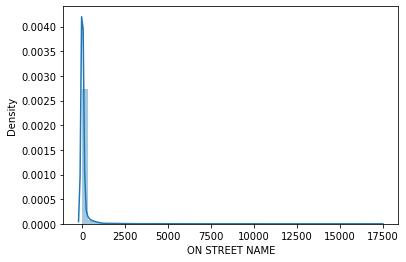

In [ ]:
# plot the histgram of street names 
import seaborn as sns

street = Vehicle_crash['ON STREET NAME'].value_counts()
sns.distplot(street)

In [ ]:
# Categorize all streets into three types of risk levels (high,medium,low risk)
# Use the risk level of street as the location variable and drop previous location related variables

NY_crash = NY_crash.drop(['LATITUDE','LONGITUDE','ZIPCODE'], axis = 1)
#Add a new column called "StreetFrequency" to count the frequency each StreetName appears
NY_crash['StreetFrequency'] = NY_crash['StreetName'].map(NY_crash['StreetName'].value_counts())

#Categorize StreetName by high frequency (>= 8000 times), medium frequency (4000-8000 times), low frequency (0-4000 times)
NY_crash['High_freq'] = NY_crash['StreetFrequency'].apply(lambda x: 1 if x>= 8000 else 0)
NY_crash['Medium_freq'] = NY_crash['StreetFrequency'].apply(lambda x: 1 if (x>= 4000 and x<8000) else 0)
NY_crash['Low_freq'] = NY_crash['StreetFrequency'].apply(lambda x: 1 if x<4000 else 0)
NY_crash

,StreetName,StreetFrequency,High_freq,Medium_freq,Low_freq
0,BRONX WHITESTONE BRIDGE,160.0,0,0,1
1,NaN,NaN,0,0,0
2,HUTCHINSON RIVER PARKWAY,164.0,0,0,1
3,VANDERVORT AVENUE,21.0,0,0,1
4,EDSON AVENUE,235.0,0,0,1
...,...,...,...,...,...
1845617,EAST 119 STREET,279.0,0,0,1
1845618,27 AVENUE,239.0,0,0,1
1845619,RALPH AVENUE,2751.0,0,0,1
1845620,NaN,NaN,0,0,0


### B.2. Date Variable

In [ ]:
# change date into three variables
from datetime import date

NY_crash['month'] = Vehicle_crash['CRASH DATE'].str[:2]
NY_crash['day'] = Vehicle_crash['CRASH DATE'].str[3:5]
NY_crash['year'] = Vehicle_crash['CRASH DATE'].str[6:10]

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

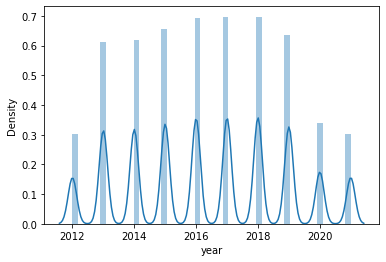

In [ ]:
# Plot the year, month, day histgrams

sns.distplot(NY_crash['year'])

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

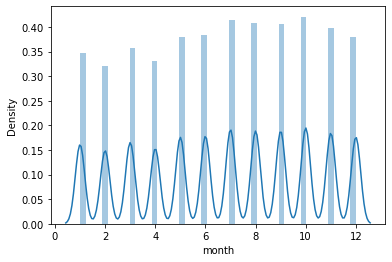

In [ ]:
sns.distplot(NY_crash['month'])

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

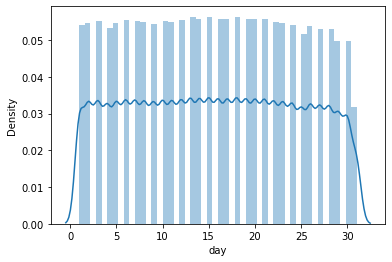

In [ ]:
sns.distplot(NY_crash['day'])

In [ ]:
# By ploting, we find there is no correlation between date and car crash frequency so we will drop all three date variables. 
NY_crash = NY_crash.drop(columns = ['year','month','day'])
NY_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845622 entries, 0 to 1845621
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   StreetName       object 
 1   StreetFrequency  float64
 2   High_freq        int64  
 3   Medium_freq      int64  
 4   Low_freq         int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 70.4+ MB


### B.3. Vehicle Involved Variable

In [ ]:
# count how many vehicles are involved
#NY_crash['vehicle_count'] = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 1'].isnull() + Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 2'].isnull() + Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 3'].isnull() + Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 4'].isnull() + Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 5'].isnull()

vehicle_count1 = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 1'].notnull()
vehicle_count2 = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 2'].notnull()
vehicle_count3 = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 3'].notnull()
vehicle_count4 = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 4'].notnull()
vehicle_count5 = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 5'].notnull()
NY_crash['vehicle_count'] = vehicle_count1*1 + vehicle_count2*1 + vehicle_count3*1 + vehicle_count4*1 + vehicle_count5*1

### B.4. Primary Cause Variable

In [ ]:
# Primary cause
NY_crash['Primary_cause'] = Vehicle_crash['CONTRIBUTING FACTOR VEHICLE 1']

In [ ]:
counts = NY_crash['Primary_cause'].value_counts()
to_remove = counts[counts <= 10000].index
NY_crash = NY_crash[~NY_crash.Primary_cause.isin(to_remove)]
NY_crash

,StreetName,StreetFrequency,High_freq,Medium_freq,Low_freq,vehicle_count,Primary_cause
0,BRONX WHITESTONE BRIDGE,160.0,0,0,1,2,Following Too Closely
1,NaN,NaN,0,0,0,1,Unspecified
2,HUTCHINSON RIVER PARKWAY,164.0,0,0,1,1,Pavement Slippery
3,VANDERVORT AVENUE,21.0,0,0,1,2,Following Too Closely
4,EDSON AVENUE,235.0,0,0,1,2,Unspecified
...,...,...,...,...,...,...,...
1845617,EAST 119 STREET,279.0,0,0,1,2,Unspecified
1845618,27 AVENUE,239.0,0,0,1,2,Failure to Yield Right-of-Way
1845619,RALPH AVENUE,2751.0,0,0,1,2,Unspecified
1845620,NaN,NaN,0,0,0,2,Unspecified


### B.5. Vehicle Type Variable

In [ ]:
# vehicle type:
NY_crash['VehicleType'] = Vehicle_crash['VEHICLE TYPE CODE 1'].str.cat(Vehicle_crash['VEHICLE TYPE CODE 2'])
counts = NY_crash['VehicleType'].value_counts()
to_remove = counts[counts <= 10000].index
NY_crash = NY_crash[~NY_crash.VehicleType.isin(to_remove)]
NY_crash

,StreetName,StreetFrequency,High_freq,Medium_freq,Low_freq,vehicle_count,Primary_cause,VehicleType
0,BRONX WHITESTONE BRIDGE,160.0,0,0,1,2,Following Too Closely,SedanSedan
1,NaN,NaN,0,0,0,1,Unspecified,NaN
2,HUTCHINSON RIVER PARKWAY,164.0,0,0,1,1,Pavement Slippery,NaN
3,VANDERVORT AVENUE,21.0,0,0,1,2,Following Too Closely,NaN
4,EDSON AVENUE,235.0,0,0,1,2,Unspecified,Station Wagon/Sport Utility VehicleSedan
...,...,...,...,...,...,...,...,...
1845613,77 STREET,867.0,0,0,1,2,Fatigued/Drowsy,SPORT UTILITY / STATION WAGONSPORT UTILITY / S...
1845616,BRIGHTON 6 STREET,94.0,0,0,1,2,Unspecified,PASSENGER VEHICLEPASSENGER VEHICLE
1845617,EAST 119 STREET,279.0,0,0,1,2,Unspecified,SPORT UTILITY / STATION WAGONPASSENGER VEHICLE
1845618,27 AVENUE,239.0,0,0,1,2,Failure to Yield Right-of-Way,PASSENGER VEHICLESPORT UTILITY / STATION WAGON


### B.6. Crash Time Variable 

In [ ]:
# crash time
NY_crash['time'] = Vehicle_crash['CRASH TIME'].str[:-3]
NY_crash['time'] = NY_crash['time'].astype(str).astype(int)
NY_crash['isRush'] = NY_crash['time'].apply(lambda x: 1 if x>= 8 and x<20 else 0)
NY_crash = NY_crash.drop(['time'], axis = 1)

<ipython-input-17-0af8fe8ed3f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_crash['time'] = Vehicle_crash['CRASH TIME'].str[:-3]
<ipython-input-17-0af8fe8ed3f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NY_crash['time'] = NY_crash['time'].astype(str).astype(int)
<ipython-input-17-0af8fe8ed3f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

### B.7. Dependent Variable 

In [ ]:
# independent variable:
# NY_crash['NumberOfInjuries'] = Vehicle_crash['NUMBER OF PERSONS INJURED'] + Vehicle_crash['NUMBER OF PERSONS KILLED'] + Vehicle_crash['NUMBER OF PEDESTRIANS INJURED']+ Vehicle_crash['NUMBER OF PEDESTRIANS KILLED'] + Vehicle_crash['NUMBER OF CYCLIST INJURED']+ Vehicle_crash['NUMBER OF CYCLIST INJURED'] + Vehicle_crash['NUMBER OF CYCLIST KILLED'] + Vehicle_crash['NUMBER OF CYCLIST INJURED'] + Vehicle_crash['NUMBER OF MOTORIST INJURED'] + Vehicle_crash['NUMBER OF MOTORIST KILLED']
# NY_crash['ifHurt'] = NY_crash['NumberOfInjuries'] > 0

NY_crash['ifHurt'] = Vehicle_crash['NUMBER OF PERSONS INJURED'] + Vehicle_crash['NUMBER OF PERSONS KILLED'] + Vehicle_crash['NUMBER OF PEDESTRIANS INJURED']+ Vehicle_crash['NUMBER OF PEDESTRIANS KILLED'] + Vehicle_crash['NUMBER OF CYCLIST INJURED']+ Vehicle_crash['NUMBER OF CYCLIST INJURED'] + Vehicle_crash['NUMBER OF CYCLIST KILLED'] + Vehicle_crash['NUMBER OF CYCLIST INJURED'] + Vehicle_crash['NUMBER OF MOTORIST INJURED'] + Vehicle_crash['NUMBER OF MOTORIST KILLED'] > 0

In [ ]:
NY_crash['if_Hurt'] = NY_crash['ifHurt'].apply(lambda x: 1 if x>0 else 0)
NY_crash = NY_crash.drop(["ifHurt"], axis = 1 )
NY_crash.head()

,StreetName,StreetFrequency,High_freq,Medium_freq,Low_freq,vehicle_count,Primary_cause,VehicleType,isRush,if_Hurt
0,BRONX WHITESTONE BRIDGE,160.0,0,0,1,2,Following Too Closely,SedanSedan,0,0
1,NaN,NaN,0,0,0,1,Unspecified,NaN,0,1
2,HUTCHINSON RIVER PARKWAY,164.0,0,0,1,1,Pavement Slippery,NaN,1,0
3,VANDERVORT AVENUE,21.0,0,0,1,2,Following Too Closely,NaN,1,0
4,EDSON AVENUE,235.0,0,0,1,2,Unspecified,Station Wagon/Sport Utility VehicleSedan,1,0


## Section C. Finalize the data

### C.1 Clean all NaN rows

In [ ]:
## drop nan
NY_crash = NY_crash.dropna()
NY_crash = NY_crash.reset_index(drop=True)
NY_crash.head(10)

,StreetName,StreetFrequency,High_freq,Medium_freq,Low_freq,vehicle_count,Primary_cause,VehicleType,isRush,if_Hurt
0,BRONX WHITESTONE BRIDGE,160.0,0,0,1,2,Following Too Closely,SedanSedan,0,0
1,EDSON AVENUE,235.0,0,0,1,2,Unspecified,Station Wagon/Sport Utility VehicleSedan,1,0
2,33 st,1.0,0,0,1,2,Driver Inattention/Distraction,SedanSedan,1,0
3,GOWANUS RAMP,716.0,0,0,1,2,Other Vehicular,SedanSedan,1,1
4,BRONX RIVER PARKWAY RAMP,48.0,0,0,1,2,Driver Inattention/Distraction,Station Wagon/Sport Utility VehicleSedan,0,0
5,BROOKLYN BRIDGE,1237.0,0,0,1,2,Unspecified,Station Wagon/Sport Utility VehicleStation Wag...,1,0
6,BRUCKNER BLVD,1.0,0,0,1,2,Driver Inattention/Distraction,SedanStation Wagon/Sport Utility Vehicle,1,0
7,COURT STREET,31.0,0,0,1,2,Following Too Closely,Pick-up TruckSedan,1,1
8,RALPH AVENUE,130.0,0,0,1,2,Driver Inexperience,SedanSedan,0,1
9,BARCLAY AVENUE,10.0,0,0,1,2,Failure to Yield Right-of-Way,Station Wagon/Sport Utility VehicleStation Wag...,0,1


In [ ]:
NY_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809173 entries, 0 to 809172
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   StreetName       809173 non-null  object 
 1   StreetFrequency  809173 non-null  float64
 2   High_freq        809173 non-null  int64  
 3   Medium_freq      809173 non-null  int64  
 4   Low_freq         809173 non-null  int64  
 5   vehicle_count    809173 non-null  int32  
 6   Primary_cause    809173 non-null  object 
 7   VehicleType      809173 non-null  object 
 8   isRush           809173 non-null  int64  
 9   if_Hurt          809173 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 58.6+ MB


In [ ]:
sum(NY_crash['High_freq'])
sum(NY_crash['High_freq'])

84629

In [ ]:
NY_crash = NY_crash.drop(['StreetName'], axis = 1)
NY_crash = NY_crash.drop(['StreetFrequency'], axis = 1)
NY_crash.head()

,High_freq,Medium_freq,Low_freq,vehicle_count,Primary_cause,VehicleType,isRush,if_Hurt
0,0,0,1,2,Following Too Closely,SedanSedan,0,0
1,0,0,1,2,Unspecified,Station Wagon/Sport Utility VehicleSedan,1,0
2,0,0,1,2,Driver Inattention/Distraction,SedanSedan,1,0
3,0,0,1,2,Other Vehicular,SedanSedan,1,1
4,0,0,1,2,Driver Inattention/Distraction,Station Wagon/Sport Utility VehicleSedan,0,0


### C.2. Test/Training Split

In [ ]:
from sklearn.model_selection import train_test_split

y = NY_crash['if_Hurt']
X = pd.get_dummies(NY_crash.drop(['if_Hurt'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 566421 entries, 476159 to 387032
Data columns (total 44 columns):
 #   Column                                                                              Non-Null Count   Dtype
---  ------                                                                              --------------   -----
 0   High_freq                                                                           566421 non-null  int64
 1   Medium_freq                                                                         566421 non-null  int64
 2   Low_freq                                                                            566421 non-null  int64
 3   vehicle_count                                                                       566421 non-null  int32
 4   isRush                                                                              566421 non-null  int64
 5   Primary_cause_Alcohol Involvement                                                   566421 non-

### C.2. Resample the data

In [ ]:
## Resample data, over sample 0 class:
from sklearn.utils import resample

# separate minority and majority classes
zero = NY_crash[NY_crash['if_Hurt']==0]
one = NY_crash[NY_crash['if_Hurt']==1]

# upsample minority
zero_upsampled = resample(zero,
                          replace=True, # sample with replacement
                          n_samples=len(one), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([one, zero_upsampled])

# check new class counts
upsampled.if_Hurt.value_counts()

0    135447
1    135447
Name: if_Hurt, dtype: int64

### C.3. Test/Training Split on resampled data

In [ ]:
from sklearn.model_selection import train_test_split

y_re = upsampled['if_Hurt']
X_re = pd.get_dummies(upsampled.drop(['if_Hurt'], axis=1))

X_re_train, X_re_test, y_re_train, y_re_test = train_test_split(X_re, y_re, test_size=0.3, random_state=88)
X_re_train.shape, X_re_test.shape
X_re_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 189625 entries, 27869 to 563861
Data columns (total 44 columns):
 #   Column                                                                              Non-Null Count   Dtype
---  ------                                                                              --------------   -----
 0   High_freq                                                                           189625 non-null  int64
 1   Medium_freq                                                                         189625 non-null  int64
 2   Low_freq                                                                            189625 non-null  int64
 3   vehicle_count                                                                       189625 non-null  int32
 4   isRush                                                                              189625 non-null  int64
 5   Primary_cause_Alcohol Involvement                                                   189625 non-n

## Section D. Baseline Model

In [ ]:
# based on the original
y_train.value_counts()
# As a result we are going to use 0 as our default prediction

y_test.value_counts()
baseAccuracy = (y_test.value_counts()[0] + 0) / len(y_test)

print ("Accuracy = (True Positive + True Negative) / Total = ",baseAccuracy)

Accuracy = (True Positive + True Negative) / Total =  0.8334390653836014


In [ ]:
# based on the resampled data
y_re_train.value_counts()
# As a result we are going to use 0 as our default prediction

y_re_test.value_counts()
baseAccuracy_re = (y_re_test.value_counts()[0] + 0) / len(y_re_test)

print ("Accuracy = (True Positive + True Negative) / Total = ",baseAccuracy_re)

Accuracy = (True Positive + True Negative) / Total =  0.5017042168600574


## Section E. Logistic regression model

### E.1. Based on the original data

In [ ]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
# Log reg train/test split
log_train, log_test = train_test_split(NY_crash, test_size=0.3, random_state=88)
log_train.shape, log_test.shape

((566421, 8), (242752, 8))

In [ ]:
def formula_from_cols(df, y):
    return y + ' ~ ' + ' + '.join([col for col in df.columns if not col==y])

In [ ]:
# Fit the logistic regression model

logreg = smf.logit(formula = formula_from_cols(log_train,'if_Hurt'),
                   data = log_train).fit()

print(logreg.summary())

         Current function value: 0.420584
         Iterations: 35


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                if_Hurt   No. Observations:               566421
Model:                          Logit   Df Residuals:                   566379
Method:                           MLE   Df Model:                           41
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.07011
Time:                        15:47:37   Log-Likelihood:            -2.3823e+05
converged:                      False   LL-Null:                   -2.5619e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   

In [ ]:
log_y_test = log_test['if_Hurt']
log_y_prob = logreg.predict(log_test)
log_y_pred = pd.Series([1 if x > 0.5 else 0 for x in log_y_prob], index=log_y_prob.index)

In [ ]:
cm = confusion_matrix(log_y_test, log_y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[200553   1766]
 [ 38694   1739]]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def metrics(test_y,pred_y):
    acc = accuracy_score(test_y,pred_y)
    TPR = recall_score(test_y,pred_y)
    cm = confusion_matrix(test_y,pred_y)
    FPR = cm[0,1]/sum(cm[0])
    return [acc,TPR,FPR]

In [ ]:
table = pd.DataFrame()
table['Logistic_Model_Ori'] = metrics(log_y_test,log_y_pred)
table.index=['Accuracy','TPR','FPR']
table

,Logistic_Model_Ori
Accuracy,0.833328
TPR,0.043009
FPR,0.008729


### E.2. Based on resampled data

In [ ]:
from sklearn.model_selection import train_test_split
# Log reg train/test split
log_re_train, log_re_test = train_test_split(upsampled, test_size=0.3, random_state=88)
log_re_train.shape, log_re_test.shape

((189625, 8), (81269, 8))

In [ ]:
# Fit the logistic regression model

logreg_re = smf.logit(formula = formula_from_cols(log_re_train,'if_Hurt'),
                   data = log_re_train).fit()

print(logreg_re.summary())

         Current function value: 0.636314
         Iterations: 35


D:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                if_Hurt   No. Observations:               189625
Model:                          Logit   Df Residuals:                   189583
Method:                           MLE   Df Model:                           41
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                 0.08199
Time:                        15:49:47   Log-Likelihood:            -1.2066e+05
converged:                      False   LL-Null:                   -1.3144e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   

In [ ]:
log_y_re_test = log_re_test['if_Hurt']
log_y_re_prob = logreg_re.predict(log_re_test)
log_y_re_pred = pd.Series([1 if x > 0.5 else 0 for x in log_y_re_prob], index=log_y_re_prob.index)

In [ ]:
cm_re = confusion_matrix(log_y_re_test, log_y_re_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[200553   1766]
 [ 38694   1739]]


In [ ]:
table['Logistic_Model_Re'] = metrics(log_y_re_test,log_y_re_pred)
table

,Logistic_Model_Ori,Logistic_Model_Re
Accuracy,0.833328,0.624260
TPR,0.043009,0.653941
FPR,0.008729,0.405219


## Section F . CART Model 

### F.1. Based on original data

In [ ]:
## CART ALgorithm:
## CART:
## Cross Validation 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 10),
'random_state': [88]} # random state is not needed
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, cv=5, verbose=0, scoring = 'accuracy')
dtc_cv_acc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                         'random_state': [88]},
             scoring='accuracy')

In [ ]:
print('Best parameters', dtc_cv_acc.best_params_)

Best parameters {'ccp_alpha': 0.0, 'random_state': 88}


In [ ]:
dtc_test_pred = dtc_cv_acc.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
## We find confusion matrix and accuracy:
def TPR(cm):
    TPR = cm.ravel()[3]/(cm.ravel()[2]+cm.ravel()[3])
    return TPR

def FPR(cm):
    FPR = cm.ravel()[1]/(cm.ravel()[0]+cm.ravel()[1])
    return FPR


cm_CART_Classification = confusion_matrix(y_test, dtc_test_pred)
print("\nCART, Confusion Matrix: \n", cm_CART_Classification)
print ("\nAccuracy:", accuracy_score(y_test, dtc_test_pred))
print ("TPR:", TPR(cm_CART_Classification))
print ("FPR:", FPR(cm_CART_Classification))


CART, Confusion Matrix: 
 [[201012   1307]
 [ 38946   1487]]

Accuracy: 0.8341805628789876
TPR: 0.03677689016397497
FPR: 0.0064600951962000604


In [ ]:
sum(y_test == 0) / len(y_test)

0.8334390653836014

In [ ]:
table['CART_Model_Ori'] = metrics(y_test,dtc_test_pred)
table

### F.2. Based on resampled data

In [ ]:
grid_values_re = {'ccp_alpha': np.linspace(0, 0.1, 10),
'random_state': [88]} # random state is not needed
dtc_re = DecisionTreeClassifier()
dtc_re_cv_acc = GridSearchCV(dtc_re, param_grid = grid_values_re, cv=5, verbose=0, scoring = 'accuracy')
dtc_re_cv_acc.fit(X_re_train, y_re_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.01111111, 0.02222222, 0.03333333, 0.04444444,
       0.05555556, 0.06666667, 0.07777778, 0.08888889, 0.1       ]),
                         'random_state': [88]},
             scoring='accuracy')

In [ ]:
print('Best parameters', dtc_re_cv_acc.best_params_)

Best parameters {'ccp_alpha': 0.0, 'random_state': 88}


In [ ]:
dtc_re_test_pred = dtc_re_cv_acc.best_estimator_.predict(X_re_test)

In [ ]:
cm_re_CART_Classification = confusion_matrix(y_re_test, dtc_re_test_pred)
print("\nCART, Confusion Matrix: \n", cm_re_CART_Classification)
print ("\nAccuracy:", accuracy_score(y_re_test, dtc_re_test_pred))
print ("TPR:", TPR(cm_re_CART_Classification))
print ("FPR:", FPR(cm_re_CART_Classification))


CART, Confusion Matrix: 
 [[24423 16350]
 [14216 26280]]

Accuracy: 0.6238910285594753
TPR: 0.6489529830106677
FPR: 0.4010006622029284


In [ ]:
sum(y_re_test == 0) / len(y_re_test)

0.5017042168600574

In [ ]:
table['CART_Model_Re'] = metrics(y_re_test,dtc_re_test_pred)
table

## Section G. Boosting Model

### G.1. Based on the original data

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=1000, random_state=88, verbose=1,
                                max_leaf_nodes=10) 
gbr.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.8962           12.44m
         2           0.8899           12.33m
         3           0.8851           12.20m
         4           0.8811           12.59m
         5           0.8780           12.45m
         6           0.8752           12.85m
         7           0.8728           12.64m
         8           0.8711           12.47m
         9           0.8693           12.32m
        10           0.8676           12.25m
        20           0.8573           12.54m
        30           0.8512           12.49m
        40           0.8473           12.20m
        50           0.8447           12.07m
        60           0.8428           11.76m
        70           0.8413           11.48m
        80           0.8402           11.31m
        90           0.8394           11.13m
       100           0.8387           10.98m
       200           0.8359            9.75m
       300           0.8349            8.53m
       40

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=1000,
                           random_state=88, verbose=1)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

boosting_y_pred = gbr.predict(X_test)
cm_gbr = confusion_matrix(y_test, boosting_y_pred)
print ("Confusion Matrix : \n", cm_gbr) 

Confusion Matrix : 
 [[201186   1133]
 [ 38968   1465]]


In [ ]:
table['Boosting_Model_Ori'] = metrics(y_test,boosting_y_pred)
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori
Accuracy,0.833328,0.624260,0.834807
TPR,0.043009,0.653941,0.036233
FPR,0.008729,0.405219,0.005600


### G.2. Based on the resampled data

In [ ]:
#Boosting on resampled data
gbr = GradientBoostingClassifier(n_estimators=1000, random_state=88, verbose=1,
                                max_leaf_nodes=10) 
gbr.fit(X_re_train, y_re_train)

      Iter       Train Loss   Remaining Time 
         1           1.3745            3.45m
         2           1.3648            3.59m
         3           1.3567            4.08m
         4           1.3499            3.85m
         5           1.3442            3.81m
         6           1.3392            3.75m
         7           1.3349            3.70m
         8           1.3311            3.63m
         9           1.3279            3.60m
        10           1.3250            3.54m
        20           1.3050            3.58m
        30           1.2938            3.44m
        40           1.2871            3.40m
        50           1.2820            3.35m
        60           1.2785            3.27m
        70           1.2759            3.20m
        80           1.2738            3.15m
        90           1.2722            3.09m
       100           1.2708            3.05m
       200           1.2653            2.72m
       300           1.2633            2.33m
       40

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=1000,
                           random_state=88, verbose=1)

In [ ]:
boosting_y_re_pred = gbr.predict(X_re_test)
cm_re_gbr = confusion_matrix(y_re_test, boosting_y_re_pred)
print ("Confusion Matrix : \n", cm_re_gbr) 

Confusion Matrix : 
 [[24010 16763]
 [13611 26885]]


In [ ]:
table['Boosting_Model_Re'] = metrics(y_re_test,boosting_y_re_pred)
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori,Boosting_Model_Re
Accuracy,0.833328,0.624260,0.834807,0.626254
TPR,0.043009,0.653941,0.036233,0.663893
FPR,0.008729,0.405219,0.005600,0.411130


## Section H. Bagging Model

### H.1. Based on the original data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

bag = RandomForestClassifier(max_features=len(X_train.columns))
bag.fit(X_train, y_train)
# the code below predicit the test data and transform result 
bag_y_pred= bag.predict(X_test)
print("Bagging Accuracy:",round(metrics.accuracy_score(y_test, bag_y_pred),5))

Bagging Accuracy: 0.83397


In [ ]:
cm_bag = confusion_matrix(y_test, bag_y_pred)
bagAccuracy = round((cm_bag.ravel()[0]+cm_bag.ravel()[3])/sum(cm_bag.ravel()),5)
bagTPR =round(cm_bag.ravel()[3]/ (cm_bag.ravel()[3] + cm_bag.ravel()[2]) ,5)     
bagFPR = round(cm_bag.ravel()[1] /(cm_bag.ravel()[0] + cm_bag.ravel()[1]),5)
print ("Accuracy = True Positive + True Negative / Total = ",bagAccuracy)
print("True Positive Rate = True Positive / Positives = ",bagTPR)
print("False Positive Rate = False Positive / Negatives = ",bagFPR )

Accuracy = True Positive + True Negative / Total =  0.83397
True Positive Rate = True Positive / Positives =  0.04111
False Positive Rate = False Positive / Negatives =  0.00757


In [ ]:
table['Bagging_Model_Ori'] = [0.83397,0.04111, 0.00757]
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori,Boosting_Model_Re,Bagging_Model_Ori
Accuracy,0.833328,0.624260,0.834807,0.626254,0.83397
TPR,0.043009,0.653941,0.036233,0.663893,0.04111
FPR,0.008729,0.405219,0.005600,0.411130,0.00757


### H.2. Based on the resampled data

In [ ]:
bag_re = RandomForestClassifier(max_features=len(X_re_train.columns))
bag_re.fit(X_re_train, y_re_train)
# the code below predicit the test data and transform result 
bag_y_re_pred= bag_re.predict(X_re_test)
print("Bagging Accuracy:",round(metrics.accuracy_score(y_re_test, bag_y_re_pred),5))

Bagging Accuracy: 0.62463


In [ ]:
cm_re_bag = confusion_matrix(y_re_test, bag_y_re_pred)
bagAccuracy_re = round((cm_re_bag.ravel()[0]+cm_re_bag.ravel()[3])/sum(cm_re_bag.ravel()),5)
bagTPR_re =round(cm_re_bag.ravel()[3]/ (cm_re_bag.ravel()[3] + cm_re_bag.ravel()[2]) ,5)     
bagFPR_re = round(cm_re_bag.ravel()[1] /(cm_re_bag.ravel()[0] + cm_re_bag.ravel()[1]),5)
print ("Confusion Matrix : \n", cm_re_bag)
print ("Accuracy = True Positive + True Negative / Total = ",bagAccuracy_re)
print("True Positive Rate = True Positive / Positives = ",bagTPR_re)
print("False Positive Rate = False Positive / Negatives = ",bagFPR_re )

NameError: ignored

In [ ]:
table['Bagging_Model_Re'] = [0.62463,0.65426,0.4048]
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori,Boosting_Model_Re,Bagging_Model_Ori,Bagging_Model_Re
Accuracy,0.833328,0.624260,0.834807,0.626254,0.83397,0.62463
TPR,0.043009,0.653941,0.036233,0.663893,0.04111,0.65426
FPR,0.008729,0.405219,0.005600,0.411130,0.00757,0.40480


## Section I. Random Forest Model

### I.1. Based on the original data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=88, verbose=2)
rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print ("Confusion Matrix : \n", cm_rf) 
accuracy_rf = (cm_rf[0][0]+cm_rf[1][1])/np.sum(cm_rf)
print(accuracy_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Confusion Matrix : 
 [[200867   1452]
 [ 38823   1610]]
0.8340899354073293


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.7s finished


In [ ]:
RF_TPR =round(cm_rf.ravel()[3]/ (cm_rf.ravel()[3] + cm_rf.ravel()[2]) ,5)     
RF_FPR = round(cm_rf.ravel()[1] /(cm_rf.ravel()[0] + cm_rf.ravel()[1]),5)

In [ ]:
table['RF_Model_Ori'] = [accuracy_rf,RF_TPR, RF_FPR]
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori,Boosting_Model_Re,Bagging_Model_Ori,Bagging_Model_Re,RF_Model_Ori
Accuracy,0.833328,0.624260,0.834807,0.626254,0.83397,0.62463,0.83409
TPR,0.043009,0.653941,0.036233,0.663893,0.04111,0.65426,0.03982
FPR,0.008729,0.405219,0.005600,0.411130,0.00757,0.40480,0.00718


### I.2. Based on the resampled data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_re = RandomForestClassifier(random_state=88, verbose=2)
rf_re.fit(X_re_train, y_re_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

y_re_pred_rf = rf_re.predict(X_re_test)
cm_re_rf = confusion_matrix(y_re_test, y_re_pred_rf)
print ("Confusion Matrix : \n", cm_re_rf) 
accuracy_re_rf = (cm_re_rf[0][0]+cm_re_rf[1][1])/np.sum(cm_re_rf)
print(accuracy_re_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Confusion Matrix : 
 [[24287 16486]
 [14015 26481]]
0.6246908415262893


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [ ]:
RF_TPR_re =round(cm_re_rf.ravel()[3]/ (cm_re_rf.ravel()[3] + cm_re_rf.ravel()[2]) ,5)     
RF_FPR_re = round(cm_re_rf.ravel()[1] /(cm_re_rf.ravel()[0] + cm_re_rf.ravel()[1]),5)

In [ ]:
table['RF_Model_Re'] = [accuracy_re_rf, RF_TPR_re, RF_FPR_re]
table

,Logistic_Model_Ori,Logistic_Model_Re,Boosting_Model_Ori,Boosting_Model_Re,Bagging_Model_Ori,Bagging_Model_Re,RF_Model_Ori,RF_Model_Re
Accuracy,0.833328,0.624260,0.834807,0.626254,0.83397,0.62463,0.83409,0.624691
TPR,0.043009,0.653941,0.036233,0.663893,0.04111,0.65426,0.03982,0.653920
FPR,0.008729,0.405219,0.005600,0.411130,0.00757,0.40480,0.00718,0.404340


## Section J. Evaluation

In [ ]:
table_ori = table.drop(['Logistic_Model_Re', 'Boosting_Model_Re','Bagging_Model_Re','RF_Model_Re'], axis=1)
table_ori

,Logistic_Model_Ori,Boosting_Model_Ori,Bagging_Model_Ori,RF_Model_Ori
Accuracy,0.833328,0.834807,0.83397,0.83409
TPR,0.043009,0.036233,0.04111,0.03982
FPR,0.008729,0.005600,0.00757,0.00718


In [ ]:
table_re = table.drop(['Logistic_Model_Ori', 'Boosting_Model_Ori','Bagging_Model_Ori','RF_Model_Ori'], axis=1)
table_re

,Logistic_Model_Re,Boosting_Model_Re,Bagging_Model_Re,RF_Model_Re
Accuracy,0.624260,0.626254,0.62463,0.624691
TPR,0.653941,0.663893,0.65426,0.653920
FPR,0.405219,0.411130,0.40480,0.404340
